<a href="https://colab.research.google.com/github/AKookani/Qiskit_course/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Computing Assignment: Grover's Algorithm with Teleportation

In this assignment, you will create a 12-qubit quantum circuit that implements Grover's search algorithm. The objective is to use Grover's algorithm on the first 4 qubits to search for the state `0010`. After applying the Grover oracle and diffuser once, you will use a quantum teleportation protocol to transfer the state of these 4 qubits, with the help of the next 4 qubits, to the last 4 qubits. Then, you will apply the oracle and diffuser again to the last 4 qubits to search for the same state `0010`. The final result will be simulated using a noisy environment under depolarizing noise.

You are provided with an outline of the circuit that you should build, as shown below:

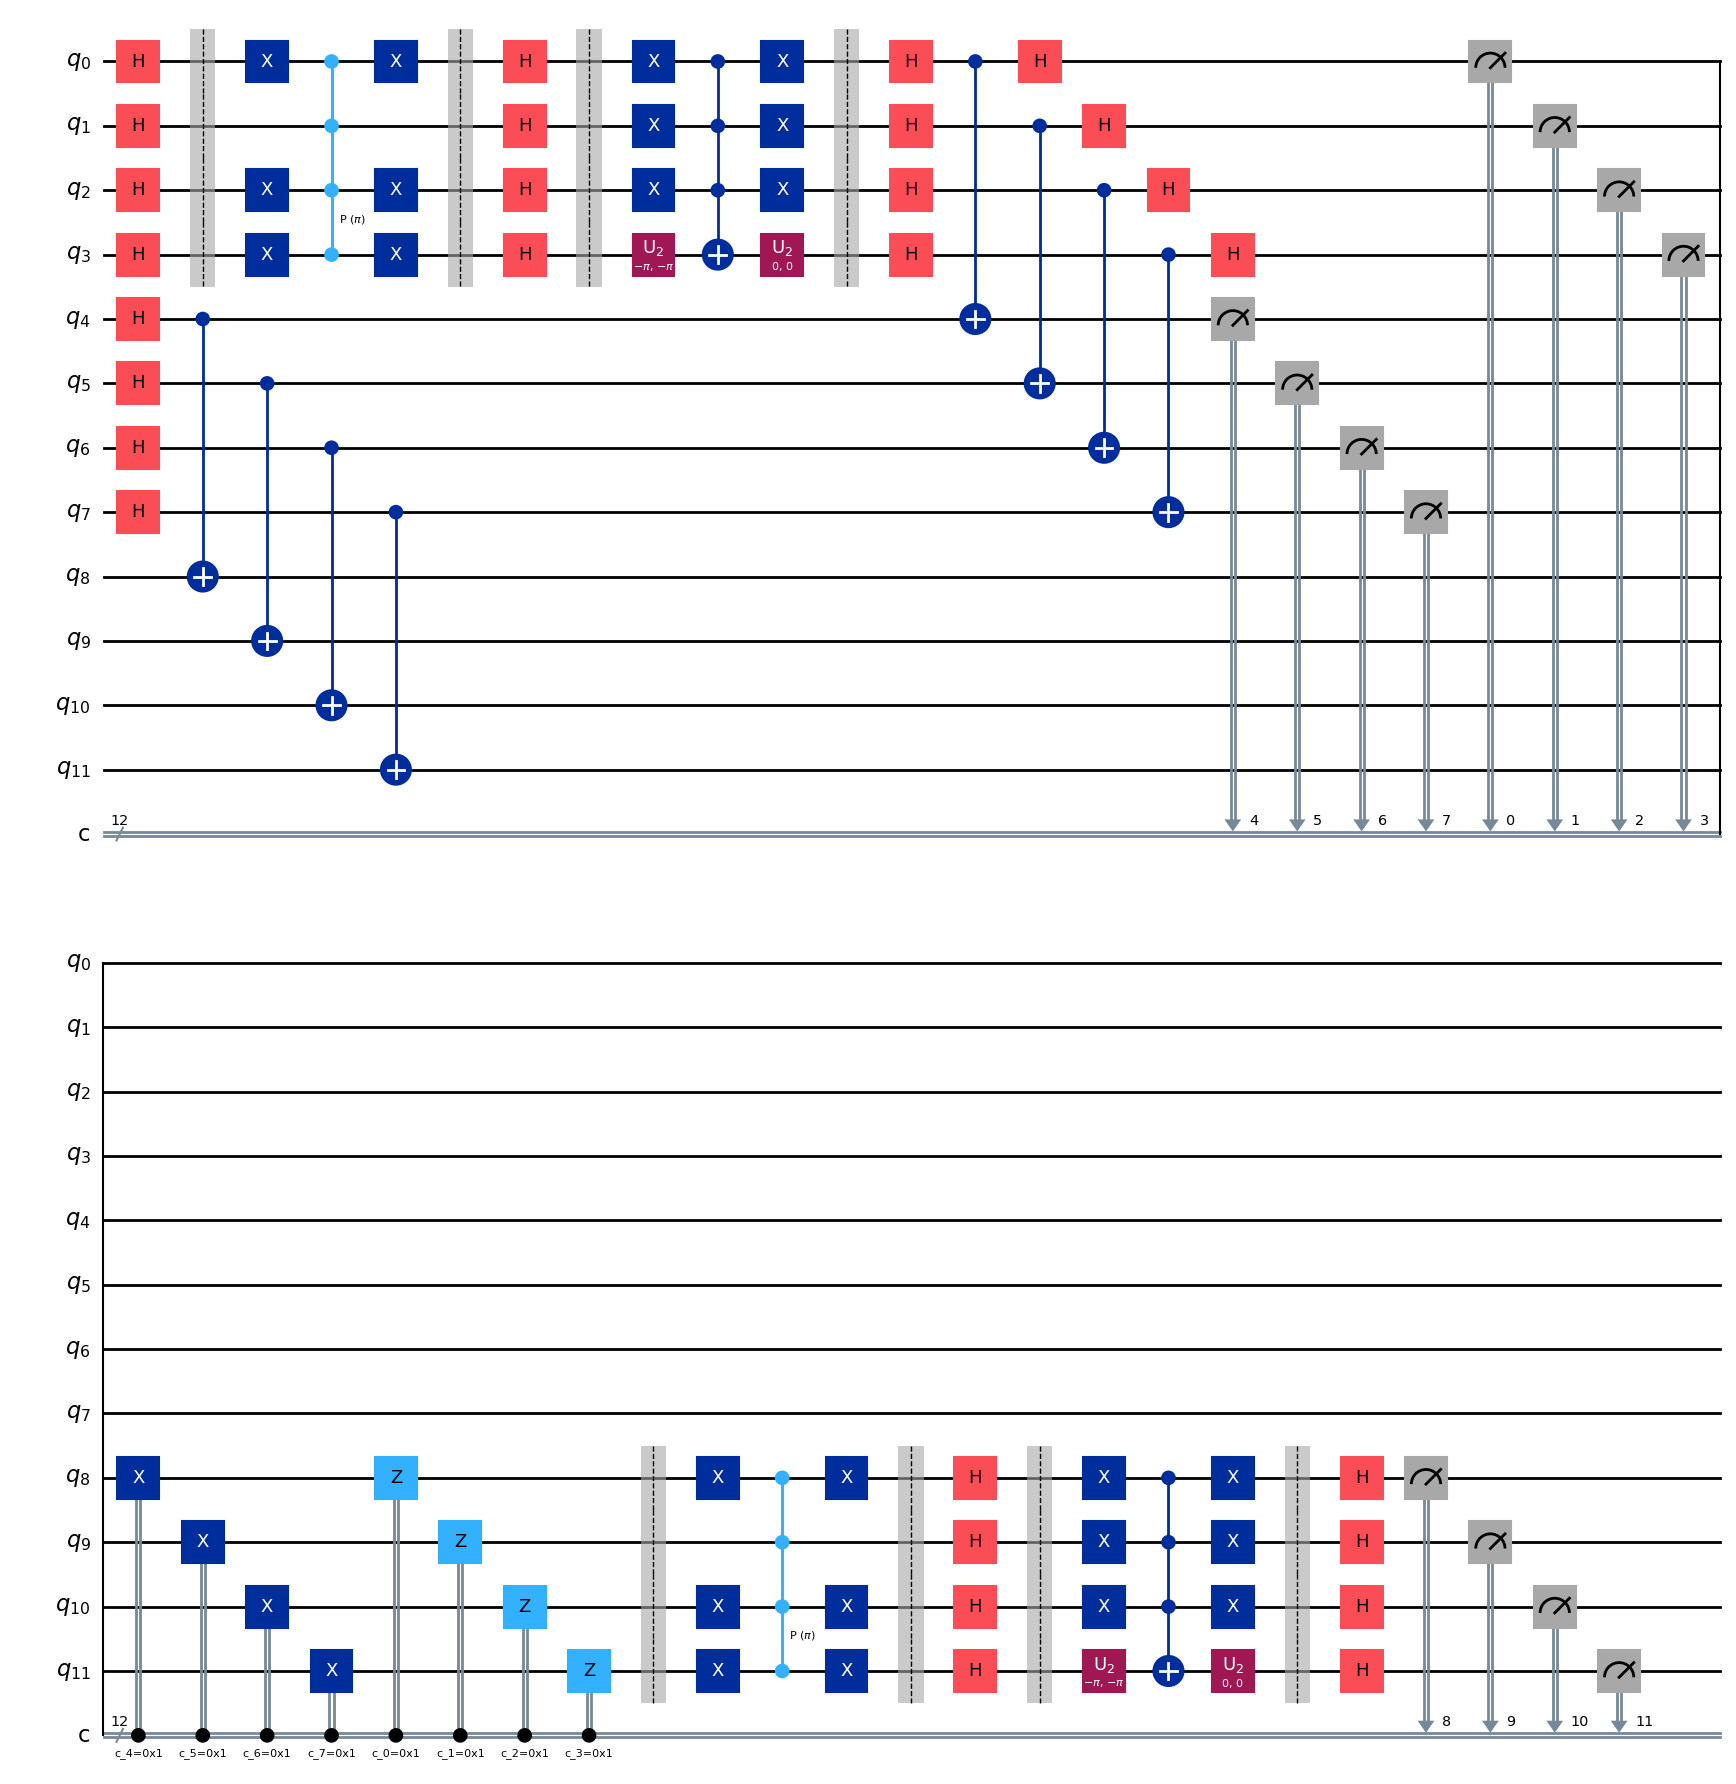

You will use the following steps to complete the task:

### Steps:

1. **Initialize a 12-qubit circuit**.
2. **Use `GroverOperator` to simplify Grover's algorithm**:
    - Import `GroverOperator` from `qiskit.circuit.library`.
    - Use the code below to define the oracle for the state `0010`
```python
mark_state = QuantumCircuit(4)
mark_state.x([0, 2, 3])
mark_state.mcp(pi, list(range(3)), 3)
mark_state.x([0, 2, 3])
```
    - Use `GroverOperator` to automatically generate a Grover operator.
    - Apply the Grover operator on the first 4 qubits once.
3. **Use the next 4 qubits as ancillae** to teleport the state of the first 4 qubits to the last 4 qubits.
    - Apply the quantum teleportation protocol between the first 4 qubits and the last 4 qubits.
4. **Apply the GroverOperator again** on the last 4 qubits to search for `0010`.
5. **Simulate the entire process** using the Aer simulator under depolarizing noise and retrieve the result of the last 4 qubits.

### Noise Model Hint

The noise model should include depolarizing noise for different types of gates with the following probabilities:

- 1-qubit gates: `0.001`
- 2-qubit gates: `0.01`
- 4-qubit gates: `0.1`

You can implement this noise model using Qiskit's noise module as shown below:

```python
# Create depolarizing errors for different gate types
error1 = noise.depolarizing_error(prob_1, 1)
error2 = noise.depolarizing_error(prob_2, 2)
error3 = noise.depolarizing_error(prob_3, 4)

# Add quantum errors according to the gates exist in the circuit
noise_model.add_all_qubit_quantum_error(error1, ['h', 'u2', 'x', 'z'])  # 1-qubit gates
noise_model.add_all_qubit_quantum_error(error2, ['cx'])  # 2-qubit gates
noise_model.add_all_qubit_quantum_error(error3, ['mcp', 'mcx'])  # 4-qubit gates
```

The outcome should be the same if you put 42 as the Aer's seed:

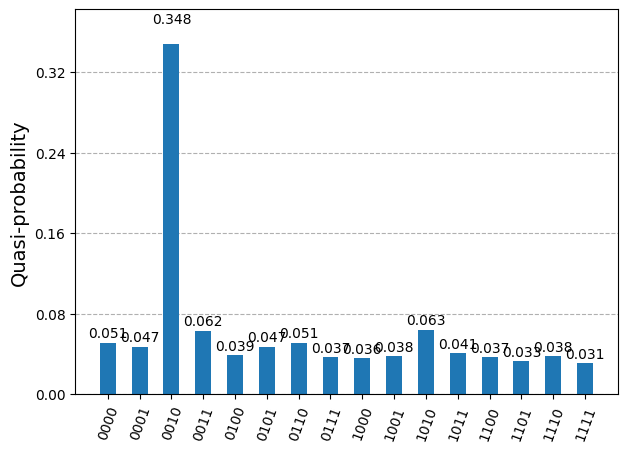